# 25 Sept 2021 (By: Kevin Cliff Gunawan)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import seaborn as sns
sns.set()

In [3]:
raw_data=pd.read_csv('2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
raw_data.describe(include='all')

,SAT,Admitted
count,168.000000,168
unique,NaN,2
top,NaN,Yes
freq,NaN,94
mean,1695.273810,NaN
std,183.019017,NaN
min,1334.000000,NaN
25%,1547.500000,NaN
50%,1691.500000,NaN
75%,1844.500000,NaN


In [8]:
data=raw_data
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [9]:
x=data['SAT']
y=data['Admitted']
print(x.shape)
print(y.shape)

(168,)
(168,)


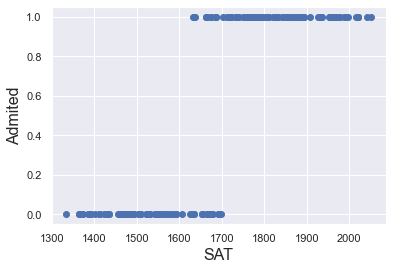

In [12]:
plt.scatter(x,y,color='C0')
plt.xlabel('SAT',fontsize=16)
plt.ylabel('Admited',fontsize=16)
plt.show()

sm.Logit(y,x)--> Statsmodels Logistic Regression

sm.add_constant(x)--> Adding a column of ones to an existing array

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


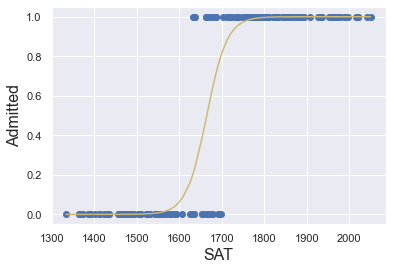

In [28]:
x1=sm.add_constant(x)
reg_log=sm.Logit(y,x1)
results_log=reg_log.fit()

#LOGIT FUNCTION
def f(x1,b0,b1):
    return np.array(np.exp(b0+x1*b1))/(1+np.exp(b0+x1*b1))

#Sorting y and x values
f_sorted= np.sort(f(x,results_log.params[0],results_log.params[1]))
x_sorted= np.sort(np.array(x))

plt.scatter(x,y,color='C0')
plt.xlabel('SAT',fontsize=16)
plt.ylabel('Admitted',fontsize=16)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

#Maximum Statsmodels No of Iterations=35

In [32]:
x1

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [33]:
x

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

In [34]:
#Regression Summary using LOGIT
results_log.summary()
#Pseudo R Squared is very high 0.7992 which means the model is still questionable and its not a good fitted model
#Logit Equation: 0.0420*SAT-69.9128

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.7992
Time:                        11:51:01   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [36]:
#Regression Predictions based on X Variable Data
yhat=results_log.predict(x1)
prediction=list(map(round,yhat))
print('Actual values:',list(y.values))
print('Predictions:',prediction)

Actual values: [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]
Predictions: [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0

In [37]:
#Confusion Matrix and Accuracy Score of Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y,prediction)
print("Confusion Matrix:\n",cm)

acc=accuracy_score(y,prediction)
print("Accuracy=",acc)

Confusion Matrix:
 [[67  7]
 [ 7 87]]
Accuracy= 0.9166666666666666


In [38]:
print(results_log)
print(results_log.params[0])
print(results_log.params[1])

-69.91280217619678
0.042004866693767386


# Bank Data Exercise

In [41]:
pd.options.display.max_rows=518
raw_bankdata=pd.read_csv('Example_bank_data.csv')
raw_bankdata

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
5,5,126,no
6,6,84,no
7,7,17,no
8,8,704,yes
9,9,185,no


In [40]:
raw_bankdata.describe(include='all')

,Unnamed: 0,duration,y
count,518.000000,518.000000,518
unique,NaN,NaN,2
top,NaN,NaN,yes
freq,NaN,NaN,259
mean,258.500000,382.177606,NaN
std,149.677988,344.295990,NaN
min,0.000000,9.000000,NaN
25%,129.250000,155.000000,NaN
50%,258.500000,266.500000,NaN
75%,387.750000,482.750000,NaN


In [46]:
new_bankdata=raw_bankdata.drop(['Unnamed: 0'],axis=1)
new_bankdata['y']=new_bankdata['y'].map({'yes':1,'no':0})
new_bankdata

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0
5,126,0
6,84,0
7,17,0
8,704,1
9,185,0


In [47]:
x=new_bankdata['duration']
y=new_bankdata['y']
print(x.shape)
print(y.shape)

(518,)
(518,)


In [49]:
x1=sm.add_constant(x)
bank_log=sm.Logit(y,x1)
result_bank=bank_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [50]:
result_bank.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.2121
Time:                        12:16:13   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [52]:
yhat2=result_bank.predict(x1)
prediction2=list(map(round,yhat2))
print('Actual values:',list(y.values))
print('Predictions:',prediction2)

Actual values: [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 

In [53]:
cm2=confusion_matrix(y,prediction2)
print("Confusion Matrix:\n",cm2)

acc2=accuracy_score(y,prediction2)
print("Accuracy=",acc2)

Confusion Matrix:
 [[204  55]
 [104 155]]
Accuracy= 0.693050193050193


In [54]:
print(result_bank.params[0])
print(result_bank.params[1])

-1.7001097987186011
0.005112218576226694


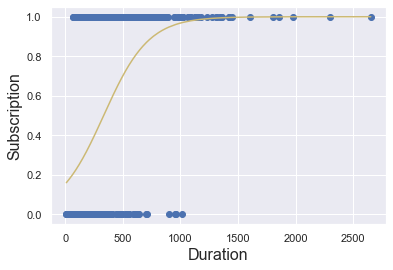

In [57]:
#LOGIT FUNCTION
def f(x1,b0,b1):
    return np.array(np.exp(b0+x1*b1))/(1+np.exp(b0+x1*b1))

#Sorting y and x values
f_sorted= np.sort(f(x,result_bank.params[0],result_bank.params[1]))
x_sorted= np.sort(np.array(x))

plt.scatter(x,y,color='C0')
plt.xlabel('Duration',fontsize=16)
plt.ylabel('Subscription',fontsize=16)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

# 2nd Bank Data (Bigger Dataset)

In [58]:
pd.options.display.max_rows=518
raw_data=pd.read_csv('Bank_data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
5,5,0.899,0.0,0.0,1.0,0.0,126.0,no
6,6,4.962,0.0,0.0,0.0,0.0,84.0,no
7,7,4.858,0.0,1.0,0.0,0.0,17.0,no
8,8,4.962,0.0,0.0,0.0,0.0,704.0,yes
9,9,4.865,0.0,0.0,0.0,0.0,185.0,no


In [59]:
raw_data.describe(include='all')

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [60]:
new_data=raw_data.drop(['Unnamed: 0'],axis=1)
new_data['y']=new_data['y'].map({'yes':1,'no':0})
new_data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
5,0.899,0.0,0.0,1.0,0.0,126.0,0
6,4.962,0.0,0.0,0.0,0.0,84.0,0
7,4.858,0.0,1.0,0.0,0.0,17.0,0
8,4.962,0.0,0.0,0.0,0.0,704.0,1
9,4.865,0.0,0.0,0.0,0.0,185.0,0


In [61]:
x=new_data['duration']
y=new_data['y']

In [62]:
x1=sm.add_constant(x)
log_bank=sm.Logit(y,x1)
bank=log_bank.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [63]:
bank.summary()
#Pseudo R Square is 0.21 which means the model is still acceptable
#Logit Equation:0.0051*duration-1.7001

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.2121
Time:                        13:47:32   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [80]:
np.exp(0.0051)

1.005113027136717

In [94]:
print('Confusion Matrix:\n',bank.pred_table())

Confusion Matrix:
 [[204.00 55.00]
 [104.00 155.00]]


204 Correct Predictions & 55 Wrong Predictions for Case 0

155 Correct Predictions & 104 Wrong Predictions for Case 1

In [95]:
bank_cm=pd.DataFrame(bank.pred_table())
bank_cm.columns=['Predicted 0','Predicted 1']
bank_cm= bank_cm.rename(index={0:'Acutal 0',1:'Actual 1'})
bank_cm

,Predicted 0,Predicted 1
Acutal 0,204.0,55.0
Actual 1,104.0,155.0


In [96]:
cm2=np.array(bank_cm)
cm2

array([[204.00, 55.00],
       [104.00, 155.00]])

In [98]:
train_acc2=(cm2[0,0]+cm2[1,1])/cm2.sum()
print(f'Bank Training accuracy is:{train_acc2*100}%')

Bank Training accuracy is:69.3050193050193%


# Binary Predictor

In [124]:
raw_binary=pd.read_csv('2.02.+Binary+predictors.csv')
raw_binary

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
5,1755,Yes,Female
6,1775,Yes,Female
7,1887,Yes,Female
8,1893,Yes,Female
9,1580,No,Male


In [125]:
raw_binary.describe(include='all')

,SAT,Admitted,Gender
count,168.000000,168,168
unique,NaN,2,2
top,NaN,Yes,Male
freq,NaN,94,90
mean,1695.273810,NaN,NaN
std,183.019017,NaN,NaN
min,1334.000000,NaN,NaN
25%,1547.500000,NaN,NaN
50%,1691.500000,NaN,NaN
75%,1844.500000,NaN,NaN


In [126]:
new_binary=raw_binary
new_binary['Admitted']=new_binary['Admitted'].map({'Yes':1,'No':0})
new_binary['Gender']=new_binary['Gender'].map({'Female':1,'Male':0})
new_binary

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
5,1755,1,1
6,1775,1,1
7,1887,1,1
8,1893,1,1
9,1580,0,0


In [127]:
x1=new_binary[['Gender','SAT']]
y1=new_binary['Admitted']
print(x1.shape)
print(y1.shape)

(168, 2)
(168,)


In [128]:
x2=sm.add_constant(x1)
log_gender=sm.Logit(y1,x2)
gender=log_gender.fit()
gender.summary()
#Log likelihood semakin dekat ke 0 semakin bagus modelnya

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.8249
Time:                        15:44:55   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [129]:
#yhat=1.9449*Gender+0.0406*SAT-68.3849
#Odds of FEMALE Admitted is 6.99x HIGHER than MALE
np.exp(1.9449)

6.992932526814459

sm.LogitResults.predict() returns the values predicted by the model

np.set_printoptions() determine the way floating point numbers,arrays or other NumPy objects are displayed

In [130]:
np.set_printoptions(formatter={'float':lambda x: "{0:0.2f}".format(x)})
gender.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [131]:
np.array(new_binary['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

sm.LogitResults.pred_table() returns a table which compares predicted and actual values

In [132]:
print('Confusion Matrix:\n',gender.pred_table())

Confusion Matrix:
 [[69.00 5.00]
 [4.00 90.00]]


Confusion Matrix: Shows how confused the model is

69x Correct Prediction for 0 & 5 Wrong Prediction for 0

90x Correct Prediction for 1 & 4 Wrong Prediction for 1

In [133]:
cm_df=pd.DataFrame(gender.pred_table())
cm_df.columns=['Predicted 0','Predicted 1']
cm_df= cm_df.rename(index={0:'Acutal 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Acutal 0,69.0,5.0
Actual 1,4.0,90.0


In [134]:
cm=np.array(cm_df)
cm

array([[69.00, 5.00],
       [4.00, 90.00]])

In [135]:
train_acc=(cm[0,0]+cm[1,1])/cm.sum()
print(f'Training accuracy is:{train_acc*100}%')

Training accuracy is:94.64285714285714%


In [136]:
test=pd.read_csv('2.03.+Test+dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [137]:
new_test=test
new_test['Admitted']=new_test['Admitted'].map({'Yes':1,'No':0})
new_test['Gender']=new_test['Gender'].map({'Female':1,'Male':0})
new_test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


Reindexing column to match test data using .reindex

In [138]:
train_data=x2.reindex(columns=['const','SAT','Gender'])
train_data

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
5,1.0,1755,1
6,1.0,1775,1
7,1.0,1887,1
8,1.0,1893,1
9,1.0,1580,0


In [139]:
test_actual=new_test['Admitted']
test_data=new_test.drop(['Admitted'],axis=1)
test_data=sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [146]:
def confusion_matrix(new_binary,actual_values,model):
    pred_val=model.predict(new_binary)
    bins=np.array([0,0.5,1])
    cm= np.histogram2d(actual_values,pred_val,bins=bins)[0]
    acc=(cm[0,0]+cm[1,1])/cm.sum()
    return cm, acc

In [147]:
cm=confusion_matrix(test_data,test_actual,gender)
print(f'Confusion Matrix & Accuracy:\n{cm}')

Confusion Matrix & Accuracy:
(array([[0.00, 6.00],
       [0.00, 13.00]]), 0.6842105263157895)
